In [1]:
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
from six.moves import cPickle as pickle
import pandas as pd
import gzip
import seaborn as sns
import string
from time import time
import nltk
from nltk.corpus import stopwords 
#stops = set(stopwords.words("english"))

In [2]:
# Import the classifier
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap         # Visualization
import numpy as np                                   # Numerical operations
import matplotlib.pyplot as plt                      # Plotting
from sklearn.model_selection import train_test_split # Data splitting
import pandas as pd
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
import itertools 
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn import metrics
from sklearn.mixture import GaussianMixture
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn import datasets, decomposition, feature_extraction
from sklearn.datasets import fetch_20newsgroups
from nltk.corpus import stopwords
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, chi2
from nltk.corpus import brown
import collections
import operator
import math
from sklearn.decomposition import TruncatedSVD
from sklearn.random_projection import sparse_random_matrix
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.metrics.pairwise import cosine_similarity as cs
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
from nltk.cluster import KMeansClusterer, euclidean_distance, cosine_distance
from sklearn.preprocessing import StandardScaler

In [3]:
import gzip
from collections import defaultdict

## Helpfulness baseline 
### Compute the global average helpfulness rate, and the average helpfulness rate for each user

In [4]:
def readGz(f):
  for l in gzip.open(f):
    yield eval(l)

allHelpful = []
userHelpful = defaultdict(list)

for l in readGz("train.json.gz"):
  user,item = l['reviewerID'],l['itemID']
  allHelpful.append(l['helpful'])
  userHelpful[user].append(l['helpful'])

averageRate = sum([x['nHelpful'] for x in allHelpful]) * 1.0 / sum([x['outOf'] for x in allHelpful])
userRate = {}
for u in userHelpful:
  totalU = sum([x['outOf'] for x in userHelpful[u]])
  if totalU > 0:
    userRate[u] = sum([x['nHelpful'] for x in userHelpful[u]]) * 1.0 / totalU
  else:
    userRate[u] = averageRate

predictions = open("predictions_Helpful.txt", 'w')
for l in open("pairs_Helpful.txt"):
  if l.startswith("userID"):
    #header
    predictions.write(l)
    continue
  u,i,outOf = l.strip().split('-')
  outOf = int(outOf)
  if u in userRate:
    predictions.write(u + '-' + i + '-' + str(outOf) + ',' + str(outOf*userRate[u]) + '\n')
  else:
    predictions.write(u + '-' + i + '-' + str(outOf) + ',' + str(outOf*averageRate) + '\n')

predictions.close()

In [5]:
averageRate

0.8519720886532813

In [6]:
userHelpful

defaultdict(list,
            {'U745881038': [{'outOf': 0, 'nHelpful': 0},
              {'outOf': 0, 'nHelpful': 0},
              {'outOf': 0, 'nHelpful': 0},
              {'outOf': 2, 'nHelpful': 2}],
             'U023577405': [{'outOf': 0, 'nHelpful': 0},
              {'outOf': 6, 'nHelpful': 6},
              {'outOf': 1, 'nHelpful': 1},
              {'outOf': 1, 'nHelpful': 1},
              {'outOf': 0, 'nHelpful': 0},
              {'outOf': 0, 'nHelpful': 0}],
             'U441384838': [{'outOf': 2, 'nHelpful': 2},
              {'outOf': 0, 'nHelpful': 0},
              {'outOf': 5, 'nHelpful': 3},
              {'outOf': 0, 'nHelpful': 0},
              {'outOf': 5, 'nHelpful': 5}],
             'U654041297': [{'outOf': 0, 'nHelpful': 0},
              {'outOf': 0, 'nHelpful': 0},
              {'outOf': 0, 'nHelpful': 0},
              {'outOf': 0, 'nHelpful': 0},
              {'outOf': 0, 'nHelpful': 0}],
             'U096604734': [{'outOf': 1, 'nHelpful': 1},
     

## For reading the files in a pandas Dataframe.

In [7]:
import pandas as pd
from collections import defaultdict

def readGz(f):
    for l in gzip.open(f):
        yield eval(l)

def parse(path):
    g = gzip.open(path, 'rb')
    for l in g:
        yield eval(l)

def getDF(path):
    i = 0
    df = {}
    for d in parse(path):
        df[i] = d
        i += 1
    return pd.DataFrame.from_dict(df, orient='index')

df = getDF('train.json.gz')
test_df = getDF('test_Helpful.json.gz')

In [8]:
df.head(5)

,categoryID,categories,itemID,reviewerID,rating,reviewText,reviewHash,reviewTime,summary,unixReviewTime,helpful,price
0,0,"[[Clothing, Shoes & Jewelry, Women], [Clothing...",I655355328,U745881038,3.0,"These are cute, but they are a little small. ...",R115160670,"05 20, 2014",Cute,1400544000,"{'outOf': 0, 'nHelpful': 0}",NaN
1,0,"[[Clothing, Shoes & Jewelry, Women, Clothing, ...",I241092314,U023577405,4.0,"I love the look of this bra, it is what I want...",R800651687,"02 7, 2013",Beautiful but size runs small,1360195200,"{'outOf': 0, 'nHelpful': 0}",NaN
2,0,"[[Clothing, Shoes & Jewelry, Wedding Party Gif...",I408260822,U441384838,3.0,it's better on a man's hand.I didn't find it v...,R345042616,"05 13, 2014",Good price but...,1399939200,"{'outOf': 2, 'nHelpful': 2}",19.99
3,0,"[[Clothing, Shoes & Jewelry, Women, Clothing, ...",I770448753,U654041297,4.0,Comfortable and easy to wear for a day of shop...,R875466866,"05 25, 2014","Easy, breezy",1400976000,"{'outOf': 0, 'nHelpful': 0}",14.95
4,0,"[[Clothing, Shoes & Jewelry, Women, Plus-Size,...",I919238161,U096604734,5.0,I'm quite small and the XS fits me like a regu...,R317526520,"07 30, 2013",Great shirt,1375142400,"{'outOf': 1, 'nHelpful': 1}",NaN


In [9]:
df.shape

(200000, 12)

In [10]:
test_df.head()

,categoryID,categories,itemID,reviewerID,rating,reviewText,reviewHash,reviewTime,summary,unixReviewTime,helpful,price
0,0,"[[Sports & Outdoors, Other Sports, Dance, Clot...",I520932398,U816789534,3.0,I ordered according to the size chart but it's...,R157684793,"07 15, 2011",Too small,1310688000,{'outOf': 2},NaN
1,0,"[[Sports & Outdoors, Clothing, Women, Hoodies]...",I969532331,U987148846,4.0,Super thin but really cute and not cheap-looki...,R732719858,"07 17, 2013",Fun hoodie,1374019200,{'outOf': 0},NaN
2,0,"[[Clothing, Shoes & Jewelry, Women, Accessorie...",I149943341,U628436634,5.0,"It was a present for my sis, and she loves Fle...",R352659313,"12 8, 2013",A Perfect hook up,1386460800,{'outOf': 1},NaN
3,0,"[[Clothing, Shoes & Jewelry, Women, Accessorie...",I909025835,U924107228,5.0,I love this thing! I guess they don't make th...,R277416618,"11 22, 2012",I love this thing...,1353542400,{'outOf': 1},7.51
4,0,"[[Clothing, Shoes & Jewelry, Women, Clothing, ...",I228439768,U060135484,4.0,I liked it and I wear it...it's a little bit s...,R645892076,"04 1, 2014",I liked it...,1396310400,{'outOf': 0},NaN


In [11]:
test_df.shape

(14000, 12)

In [12]:
#1. Define function to get the first review time for each item
def first_review_time(data_df):
    time_dict = {}
    for i in range(len(data_df)):
        pid = data_df['itemID'][i]
        #print (pid)
        time_i = data_df['reviewTime'][i]
        if pid in time_dict:
            if time_i < time_dict[pid]:
                time_dict[pid] = time_i
        else:
            time_dict[pid] = time_i
    data_df['firstReviewTime'] = data_df['itemID'].map(time_dict).values
    return data_df
# convert reviewTime to datatime data type
df['reviewTime'] = pd.to_datetime(df['reviewTime'])
df = first_review_time(df)
df['review_first_dif'] = (df['reviewTime'] - df['firstReviewTime']).astype('timedelta64[D]')
test_df['reviewTime'] = pd.to_datetime(test_df['reviewTime'])
test_df = first_review_time(test_df)
test_df['review_first_dif'] = (test_df['reviewTime'] - test_df['firstReviewTime']).astype('timedelta64[D]')

In [13]:
#2. Rating score deviation from mean
def deviation_mean(data_df):
    rating_mean_dict = data_df['rating'].groupby(data_df['itemID']).mean().to_dict()
    data_df['rating_mean'] = data_df['itemID'].map(rating_mean_dict).values
    data_df['rating_mean_dev'] = data_df['rating'] - data_df['rating_mean']
    return data_df['rating_mean_dev']
df['rating_mean_dev'] = deviation_mean(df)
test_df['rating_mean_dev'] = deviation_mean(test_df)

In [14]:
#3. Number of words of each review text
df['reviewWords'] = df['reviewText'].apply(lambda x: len(x.split()))
test_df['reviewWords'] = test_df['reviewText'].apply(lambda x: len(x.split()))

In [15]:
#4. Number of words of each review summary
df['summaryWords'] = df['summary'].apply(lambda x: len(x.split()))
test_df['summaryWords'] = test_df['summary'].apply(lambda x: len(x.split()))
#df.head(5)

In [16]:
#5. Ratio of summary words to review text words
df['ratiosuWord'] = df['summaryWords'] / df['reviewWords']
test_df['ratiosuWord'] = test_df['summaryWords'] / test_df['reviewWords']

In [17]:
#6. Number of sentences of each review text
def count_sentence(data_df, text):
    pun_sen = ['.', '!', '?']
    text_col = data_df[text]
    sentence_counts = []
    for i in text_col:
        sentence_count = []
        for j in pun_sen:
            count_a = i.count(j)
            sentence_count.append(count_a)
        sentence_counts.append(sum(sentence_count))
    data_df['reviewSentences'] = sentence_counts
    return data_df['reviewSentences']
df['reviewSentences'] = count_sentence(df, 'reviewText')
test_df['reviewSentences'] = count_sentence(test_df, 'reviewText')

In [18]:
#7. Number of characters of each review text
punctuation = ['!','"','#','$','%','&',"'",'(',')','*','+',',','-','.','/',':',';','<','=','>','?','@','[','\\',']','^','_','`','{','|','}','~','``',"''",'--']
def count_characters(data_df):
    reviewcharacters = []
    text_col = data_df['reviewText']
    for i in text_col:
        a = dict(collections.Counter(i))
        b = {k:v for k, v in a.items() if k not in punctuation}
        c = sum(list(b.values()))
        reviewcharacters.append(c)
    data_df['reviewChars'] = reviewcharacters
    return data_df['reviewChars']
df['reviewChars'] = count_characters(df)
test_df['reviewChars'] = count_characters(test_df)
#df.head(5)

In [19]:
#punctuation = ['!','"','#','$','%','&',"'",'(',')','*','+',',','-','.','/',':',';','<','=','>','?','@','[','\\',']','^','_','`','{','|','}','~','``',"''",'--']
#lowercase_words = [x.lower() for x in brown.words()]
#punctuation_stopwords = punctuation + stopwords.words('english')
#filtered_words = [x for x in lowercase_words if x not in punctuation_stopwords]
#final_filtered_words = list(filter(lambda x: x.isalpha() and len(x) > 1, filtered_words))

In [20]:
#8. Readability of each review (ARI as index to measure)
def readability(data_df):
    wordperSen = []
    charperWord = []
    reviewRead = []
    len_df = len(data_df)
    a = list(data_df['reviewWords'])
    b = list(data_df['reviewSentences'])
    c = list(data_df['reviewChars'])
    for i in range(len_df):
        if b[i] == 0:
            wordperSen.append(0)
        else:
            j = a[i] / b[i]
            wordperSen.append(j)
        if a[i] == 0:
            charperWord.append(0)
        else:
            l = c[i] / a[i]
            charperWord.append(l)
        ari = 4.71 * charperWord[i] + 0.5 * wordperSen[i] - 21.43
        reviewRead.append(ari)
    data_df['reviewRead'] = reviewRead
    return data_df['reviewRead']
df['reviewRead'] = readability(df)
test_df['reviewRead'] = readability(df)

In [21]:
#9. Number of punctuations of each review text
def numpunct(data_df):
    reviewPuncts = []
    for i in data_df['reviewText']:
        a = dict(collections.Counter(i))
        b = {k:v for k,v in a.items() if k in punctuation}
        c = sum(list(b.values()))
        reviewPuncts.append(c)
    data_df['reviewPuncts'] = reviewPuncts
    return data_df['reviewPuncts']
df['reviewPuncts'] = numpunct(df)
test_df['reviewPuncts'] = numpunct(test_df)

In [22]:
#10. Ratio of punctuations with characters
def ratio_puncts_chars(data_df):
    return data_df['reviewPuncts'] / data_df['reviewChars']
df['ratiopunChar'] = ratio_puncts_chars(df)
test_df['ratiopunChar'] = ratio_puncts_chars(test_df)

In [23]:
#11. Number of capital words of each review text
def numcapwords(data_df):
    reviewCwords = []
    for i in data_df['reviewText']:
        a = i.split()
        b = [word for word in a if word.isupper()]
        c = len(b)
        reviewCwords.append(c)
    data_df['reviewCwords'] = reviewCwords
    return data_df['reviewCwords']
df['reviewCwords'] = numcapwords(df)
test_df['reviewCwords'] = numcapwords(test_df)

In [24]:
#12. Number of capital words of each summary
def numcapwords(data_df):
    reviewCwords = []
    for i in data_df['summary']:
        a = i.split()
        b = [word for word in a if word.isupper()]
        c = len(b)
        reviewCwords.append(c)
    data_df['summaryCwords'] = reviewCwords
    return data_df['summaryCwords']
df['summaryCwords'] = numcapwords(df)
test_df['summaryCwords'] = numcapwords(test_df)

In [25]:
import re
#13. Number of exclimation and question marks of each review text
def numexclquest(data_df):
    suexcqueMarks = []
    for i in data_df['reviewText']:
        a = re.findall(r'[!?]', i)
        suexcqueMarks.append(len(a))
    data_df['numexclquest'] = suexcqueMarks
    return data_df['numexclquest']
df['numexclquest'] = numexclquest(df)
test_df['numexclquest'] = numexclquest(test_df)

In [26]:
#14. Number of exclimation and question marks of each summary text
def numexclquest(data_df):
    suexcqueMarks = []
    for i in data_df['summary']:
        a = re.findall(r'[!?]', i)
        suexcqueMarks.append(len(a))
    data_df['sunumexclquest'] = suexcqueMarks
    return data_df['sunumexclquest']
df['sunumexclquest'] = numexclquest(df)
test_df['sunumexclquest'] = numexclquest(test_df)

In [27]:
#15. Number of reviews of each product (measure the popularity of each product)
def numreviewPro(data_df):
    itemid_dict = data_df.groupby('itemID')['itemID'].count().to_dict()
    data_df['numreviewPro'] = data_df['itemID'].map(itemid_dict).values
    return data_df['numreviewPro']
df['numreviewPro'] = numreviewPro(df)
test_df['numreviewPro'] = numreviewPro(test_df)

In [28]:
#16. Number of reviews of each reviewers (measure reviewer’s experience)
def numreviewPro(data_df):
    itemid_dict = data_df.groupby('reviewerID')['reviewerID'].count().to_dict()
    data_df['numreviews'] = data_df['reviewerID'].map(itemid_dict).values
    return data_df['numreviews']
df['numreviews'] = numreviewPro(df)
test_df['numreviews'] = numreviewPro(test_df)

In [29]:
#17. Breaking up helpful column into two features
df['helpful_numerator'] = df['helpful'].apply(lambda x: x['nHelpful'])

df['helpful_denominator'] = df['helpful'].apply(lambda x: x['outOf'])
test_df['helpful_denominator'] = test_df['helpful'].apply(lambda x: x['outOf'])

df['helpratio'] = df['helpful_numerator'] / df['helpful_denominator']
df['helpratio'] = df['helpratio'].fillna(0)
#test_df.head(5)

,categoryID,categories,itemID,reviewerID,rating,reviewText,reviewHash,reviewTime,summary,unixReviewTime,...,reviewRead,reviewPuncts,ratiopunChar,reviewCwords,summaryCwords,numexclquest,sunumexclquest,numreviewPro,numreviews,helpful_denominator
0,0,"[[Sports & Outdoors, Other Sports, Dance, Clot...",I520932398,U816789534,3.0,I ordered according to the size chart but it's...,R157684793,2011-07-15,Too small,1310688000,...,7.138750,5,0.035211,1,0,0,0,2,1,2
1,0,"[[Sports & Outdoors, Clothing, Women, Hoodies]...",I969532331,U987148846,4.0,Super thin but really cute and not cheap-looki...,R732719858,2013-07-17,Fun hoodie,1374019200,...,9.636842,5,0.035971,0,0,0,0,1,1,0
2,0,"[[Clothing, Shoes & Jewelry, Women, Accessorie...",I149943341,U628436634,5.0,"It was a present for my sis, and she loves Fle...",R352659313,2013-12-08,A Perfect hook up,1386460800,...,8.615357,3,0.027523,0,1,0,0,1,2,1
3,0,"[[Clothing, Shoes & Jewelry, Women, Accessorie...",I909025835,U924107228,5.0,I love this thing! I guess they don't make th...,R277416618,2012-11-22,I love this thing...,1353542400,...,11.541290,23,0.035770,2,1,1,0,2,2,1
4,0,"[[Clothing, Shoes & Jewelry, Women, Clothing, ...",I228439768,U060135484,4.0,I liked it and I wear it...it's a little bit s...,R645892076,2014-04-01,I liked it...,1396310400,...,12.907208,13,0.073446,4,1,0,0,4,1,0


In [30]:
#df_less = df.drop(columns = ['categoryID', 'categories', 'reviewerID','reviewText','reviewHash','reviewTime','summary','unixReviewTime','helpful','firstReviewTime'], axis = 1)
#train_df['helpratio'] = train_df['nHelpful'] / train_df['outOf']
#test_df_less = test_df.drop(columns = ['categoryID', 'categories', 'reviewerID', 'reviewText','reviewHash','reviewTime','summary','unixReviewTime', 'firstReviewTime','helpful'])
#df_less.corr

In [34]:
#Define helpful_overall as a binary variable with 0.75 helpratio as 1 o/w 0. Filter out those with 0 input.
threshold = 0
df['threshold'] = df['helpful_denominator'].apply(lambda x: 1 if x>0 else 0)
df['helpful_overall'] = np.where(df.loc[:, 'helpratio']> .8, 1, 0)
#df1.loc[:, 'Helpful'] = np.where(df.loc[:, 'helpful_numerator'] / df.loc[:, 'helpful_denominator'] > threshold, 1, 0)
df1 = df.loc[df['helpful_overall']==1]
df1 = df.loc[df['threshold'] > threshold]
#df1.head(5)

In [35]:
df_final = df1[['rating','summary','helpful_numerator','helpful_denominator']]
df_final.head()

,rating,summary,helpful_numerator,helpful_denominator
2,3.0,Good price but...,2,2
4,5.0,Great shirt,1,1
5,4.0,Surprisingly comfortable,1,1
14,4.0,Good quality rain jacket,1,1
20,5.0,This years new pair,1,1


In [37]:
df_final["Sentiment"] = df_final["rating"].apply(lambda rating: "positive" if rating > 3 else "negative")
df_final["Usefulness"] = (df_final["helpful_numerator"]/df_final["helpful_denominator"]).apply(lambda n: "useful" if n > 0.8 else "useless")
df_final.head()

/Users/felipegomez/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/felipegomez/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,rating,summary,helpful_numerator,helpful_denominator,Sentiment,Usefulness
2,3.0,Good price but...,2,2,negative,useful
4,5.0,Great shirt,1,1,positive,useful
5,4.0,Surprisingly comfortable,1,1,positive,useful
14,4.0,Good quality rain jacket,1,1,positive,useful
20,5.0,This years new pair,1,1,positive,useful


In [38]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

import re
import string
import nltk

cleanup_re = re.compile('[^a-z]+')
def cleanup(sentence):
    sentence = sentence.lower()
    sentence = cleanup_re.sub(' ', sentence).strip()
    #sentence = " ".join(nltk.word_tokenize(sentence))
    return sentence

df_final["Summary_Clean"] = df_final["summary"].apply(cleanup)

train, test = train_test_split(df_final, test_size=0.2)
print("%d items in training data, %d in test data" % (len(train), len(test)))

50412 items in training data, 12604 in test data


/Users/felipegomez/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [40]:
from wordcloud import WordCloud, STOPWORDS

# To cleanup stop words, add stop_words = STOPWORDS
# But it seems to function better without it
count_vect = CountVectorizer(min_df = 1, ngram_range = (1, 4))
X_train_counts = count_vect.fit_transform(train["Summary_Clean"])

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

X_new_counts = count_vect.transform(test["Summary_Clean"])
X_test_tfidf = tfidf_transformer.transform(X_new_counts)

y_train = train["Sentiment"]
y_test = test["Sentiment"]

prediction = dict()

In [41]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e5)
logreg_result = logreg.fit(X_train_tfidf, y_train)
prediction['Logistic'] = logreg.predict(X_test_tfidf)

/Users/felipegomez/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/felipegomez/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [62]:
pred_prob = logreg.predict_proba
pred_prob

<bound method LogisticRegression.predict_proba of LogisticRegression(C=100000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)>

In [47]:
pred_y = list(prediction.values())
pred_y

[array(['positive', 'negative', 'positive', ..., 'positive', 'positive',
        'positive'], dtype=object)]

In [55]:
pred_yy = []
for i in pred_y[0]:
    #print(i)
    if i == 'positive':
        pred_yy.append(1)
    else:
        pred_yy.append(0)
pred_yy

[1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [ ]:
counter_test = 0
prediction_values = []
for i in test_df['helpful_denominator']:
    if i == 0:
        prediction_values.append(0)
    elif i == 1:
        if test_df.loc[counter_test,['rating']].item() >=3:
              prediction_values.append(1)
        else:
            prediction_values.append(0)
    elif i == 2:
        if test_df.loc[counter_test,['rating']].item() >=3:
            prediction_values.append(2)
        else:
            prediction_values.append(int(round(i*probas3[counter_test][0],0)))
    #elif i ==3:
    #    if test_df.loc[counter_test,['rating']].item() >=3:
    #        prediction_values9.append(3)
        #elif test_df.loc[counter_test,['rating']].item() >=3:
        #    prediction_values7.append(int(round(i*probas3[counter_test][1],0)))       
    #    else:
    #        prediction_values9.append(int(round(i*probas3[counter_test][1],0)))
    elif test_df.loc[counter_test,['rating']].item() ==5:
        prediction_values.append(max(i,i*pred_test[counter_test]))
    elif test_df.loc[counter_test,['rating']].item() ==4:
        prediction_values.append(i*pred_test[counter_test])
    elif probas3[counter_test][1] <= .5:
        prediction_values.append(int(round(i*probas3[counter_test][0],0)))
    #elif probas3[counter_test][1] <=.65:
        #print(probas3[counter_test][1])
    #    prediction_values10.append(int(round(i*probas3[counter_test][1],0)))
    else:
        prediction_values.append(i*pred_test[counter_test])
    counter_test += 1
prediction_values

In [ ]:
counter = 0
predictions = open("predictions_Helpful_testdf13.txt", 'w')
for l in open("pairs_Helpful.txt"):
  if l.startswith("userID"):
    #header
    predictions.write(l)
    continue
  u,i,outOf = l.strip().split('-')
  outOf = int(outOf)
  #for pred in b:
  predictions.write(u + '-' + i + '-' + str(outOf) + ',' + str(test_df.loc[counter,'predictions']) + '\n')
  counter +=1
  #else:
  #  predictions.write(u + '-' + i + '-' + str(outOf) + ',' + str(outOf*averageRate) + '\n')
predictions.close()

In [32]:
df2 = df1.drop(columns = ['reviewHash','reviewTime','unixReviewTime','firstReviewTime'], axis = 1)
df2.head(5)

,categoryID,categories,itemID,reviewerID,rating,reviewText,summary,helpful,price,review_first_dif,...,summaryCwords,numexclquest,sunumexclquest,numreviewPro,numreviews,helpful_numerator,helpful_denominator,helpratio,threshold,helpful_overall
2,0,"[[Clothing, Shoes & Jewelry, Wedding Party Gif...",I408260822,U441384838,3.0,it's better on a man's hand.I didn't find it v...,Good price but...,"{'outOf': 2, 'nHelpful': 2}",19.99,485.0,...,0,0,0,12,5,2,2,1.0,1,1
4,0,"[[Clothing, Shoes & Jewelry, Women, Plus-Size,...",I919238161,U096604734,5.0,I'm quite small and the XS fits me like a regu...,Great shirt,"{'outOf': 1, 'nHelpful': 1}",NaN,218.0,...,0,1,0,8,5,1,1,1.0,1,1
5,0,"[[Clothing, Shoes & Jewelry, Women, Clothing, ...",I098334555,U481392145,4.0,This bra help up my extra large girls (44DDD) ...,Surprisingly comfortable,"{'outOf': 1, 'nHelpful': 1}",NaN,1955.0,...,0,0,0,164,6,1,1,1.0,1,1
14,3,"[[Clothing, Shoes & Jewelry, W, Western Chief]...",I271970438,U389466867,4.0,Got 3T for average sz 2.5 yr old. Looks small....,Good quality rain jacket,"{'outOf': 1, 'nHelpful': 1}",NaN,25.0,...,0,0,0,6,9,1,1,1.0,1,1
20,0,"[[Clothing, Shoes & Jewelry, Shoes & Accessori...",I150236675,U867387122,5.0,"Love the boots, I wear a size 7 and they are t...",This years new pair,"{'outOf': 1, 'nHelpful': 1}",NaN,0.0,...,0,0,0,11,5,1,1,1.0,1,1


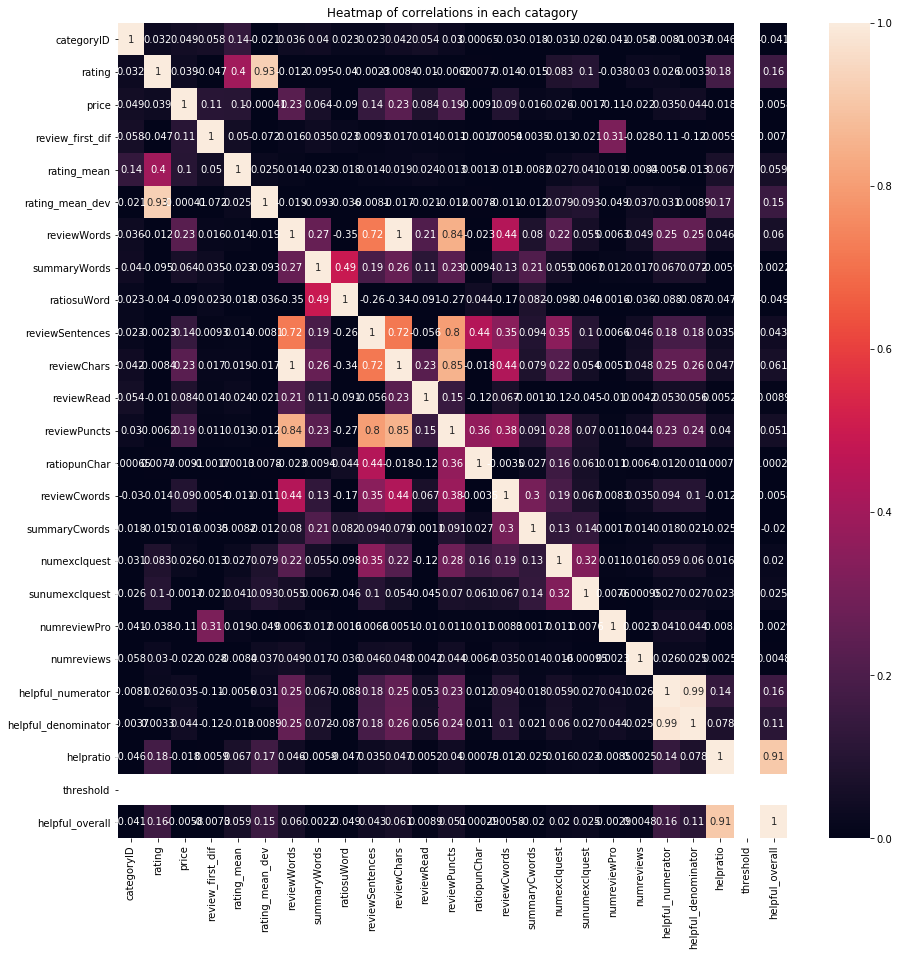

In [33]:
correlations = df2.corr()
plt.figure(figsize = (15,15))
plt.title("Heatmap of correlations in each catagory")
_ = sns.heatmap(correlations, vmin=0, vmax=1, annot=True)

In [34]:
df3 = df2[['rating','rating_mean_dev','reviewText','reviewChars', 'reviewWords', 'helpful_numerator','helpful_denominator','helpratio','helpful_overall','threshold']]
df3.loc[:, 'reviewText'] = df3['reviewText'].str.lower()
test_df.loc[:, 'reviewText'] = test_df['reviewText'].str.lower()
df3

/Users/felipegomez/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,rating,rating_mean_dev,reviewText,reviewChars,reviewWords,helpful_numerator,helpful_denominator,helpratio,helpful_overall,threshold
2,3.0,-1.083333,it's better on a man's hand.i didn't find it v...,137,28,2,2,1.0,1,1
4,5.0,0.500000,i'm quite small and the xs fits me like a regu...,404,77,1,1,1.0,1,1
5,4.0,0.024390,this bra help up my extra large girls (44ddd) ...,456,80,1,1,1.0,1,1
14,4.0,-0.833333,got 3t for average sz 2.5 yr old. looks small....,386,83,1,1,1.0,1,1
20,5.0,0.181818,"love the boots, i wear a size 7 and they are t...",129,29,1,1,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...
199979,5.0,0.333333,i love this hat. it is the cutest and so soft...,115,24,2,2,1.0,1,1
199984,5.0,0.812500,this is perfect to dress up or down. the semi ...,416,77,1,1,1.0,1,1
199992,4.0,-0.571429,these boots felt great even out of the box! i...,506,98,0,1,0.0,0,1
199996,2.0,-2.384615,"i've used my yaktrax maybe 10 times, 4 of them...",738,148,0,1,0.0,0,1


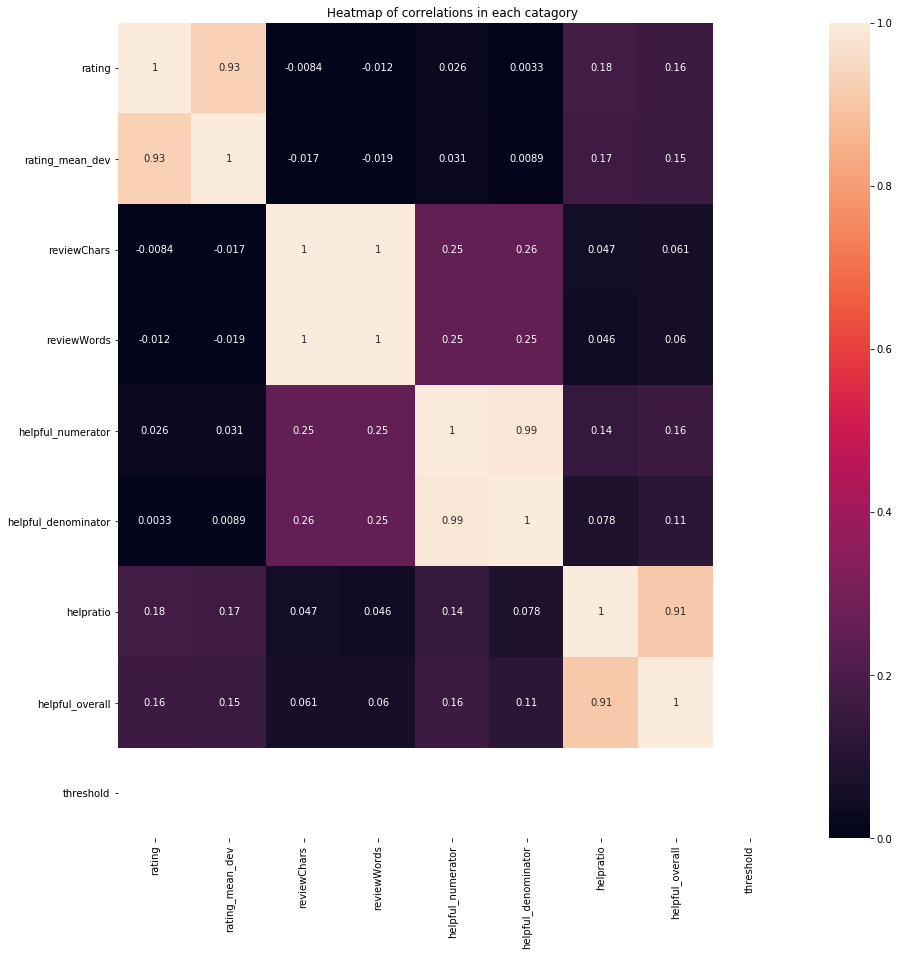

In [35]:
correlations1 = df3.corr()
plt.figure(figsize = (15,15))
plt.title("Heatmap of correlations in each catagory")
_ = sns.heatmap(correlations1, vmin=0, vmax=1, annot=True)

In [36]:
#tokenize text with Tfidf
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.snowball import SnowballStemmer

#create a stemmer
stemmer = SnowballStemmer("english")


#define our own tokenizing function that we will pass into the TFIDFVectorizer. We will also stem the words here.
def tokens(x):
    x = x.split()
    stems = []
    [stems.append(stemmer.stem(word)) for word in x]
    return stems


#define the vectorizer
vectorizer = TfidfVectorizer(tokenizer = tokens, lowercase=True,smooth_idf=True, stop_words= set(stopwords.words('english')), ngram_range=(1, 1), min_df = 0.001)
#stop_words = 'english'
#fit the vectorizers to the data.
vectorizer_scalar = vectorizer.fit(df3['reviewText'])
features_train = vectorizer_scalar.transform(df3['reviewText'])
features_test = vectorizer_scalar.transform(test_df['reviewText'])
features_train

/Users/felipegomez/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'onc', 'onli', 'ourselv', "should'v", 'themselv', 'veri', 'whi', "you'r", "you'v", 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


<63016x3412 sparse matrix of type '<class 'numpy.float64'>'
	with 1860137 stored elements in Compressed Sparse Row format>

In [37]:
features_test

<14000x3412 sparse matrix of type '<class 'numpy.float64'>'
	with 329134 stored elements in Compressed Sparse Row format>

In [38]:
features_train

<63016x3412 sparse matrix of type '<class 'numpy.float64'>'
	with 1860137 stored elements in Compressed Sparse Row format>

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(features_train,df3['helpful_overall'], test_size=0.2, random_state=42)

In [40]:
from sklearn.metrics import roc_auc_score, roc_curve

def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Print the results
    print ("Trained model in {:.4f} seconds".format(end - start))

    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on roc_auc score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    probas = clf.predict_proba(features)
    pred = clf.predict(x_te)
    end = time()
    
    # Print and return results
    print("Test accuracy for model = ", accuracy_score(y_val,pred))
    print ("Made predictions in {:.4f} seconds.".format(end - start))
    return roc_auc_score(target.values, probas[:,1].T)


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on roc_auc score. '''
    
    # Indicate the classifier and the training set size
    print ("Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, X_train.shape[0]))
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for both training and testing
    print ("ROC_AUC score for training set: {:.4f}.".format(predict_labels(clf, X_train, y_train)))
    print ("ROC_AUC score for test set: {:.4f}.\n".format(predict_labels(clf, X_test, y_test)))
    
def clf_test_roc_score(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    probas = probas =clf.predict_proba(X_test)
    return roc_auc_score(y_test, probas[:,1].T)

In [41]:
# Import the supervised learning models from sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


# Initialize the models using a random state were applicable.
clf_list = [GaussianNB(), 
            AdaBoostClassifier(random_state = 42), 
            RandomForestClassifier(random_state = 42), 
            LogisticRegression(random_state = 42)]
            #DecisionTreeClassifier(random_state = RAN_STATE)]
x_tr = X_train.toarray()
x_te = X_val.toarray()


# Set up the training set sizes for 100, 200 and 300 respectively.
train_feature_list = [x_tr[0:10000],x_tr[0:20000],x_tr]
train_target_list = [y_train[0:10000], y_train[0:20000], y_train]


# Execute the 'train_predict' function for each of the classifiers and each training set size
for clf in clf_list:
    for a, b in zip(train_feature_list, train_target_list):
        train_predict(clf, a, b, x_te, y_val)

Training a GaussianNB using a training set size of 10000. . .
Trained model in 0.6545 seconds
Test accuracy for model =  0.4407331006029832
Made predictions in 1.6051 seconds.
ROC_AUC score for training set: 0.7637.
Test accuracy for model =  0.4407331006029832
Made predictions in 1.7682 seconds.
ROC_AUC score for test set: 0.5406.

Training a GaussianNB using a training set size of 20000. . .
Trained model in 1.2693 seconds
Test accuracy for model =  0.511583624246271
Made predictions in 2.2539 seconds.
ROC_AUC score for training set: 0.7337.
Test accuracy for model =  0.511583624246271
Made predictions in 1.7346 seconds.
ROC_AUC score for test set: 0.5474.

Training a GaussianNB using a training set size of 50412. . .
Trained model in 3.2947 seconds
Test accuracy for model =  0.5489527134243097
Made predictions in 4.4345 seconds.
ROC_AUC score for training set: 0.6602.
Test accuracy for model =  0.5489527134243097
Made predictions in 1.5961 seconds.
ROC_AUC score for test set: 0.5632

/Users/felipegomez/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Trained model in 14.5271 seconds
Test accuracy for model =  0.742780069819105
Made predictions in 0.4743 seconds.
ROC_AUC score for training set: 0.9994.
Test accuracy for model =  0.742780069819105
Made predictions in 0.5272 seconds.
ROC_AUC score for test set: 0.5471.

Training a RandomForestClassifier using a training set size of 20000. . .
Trained model in 33.1062 seconds
Test accuracy for model =  0.7458743256109172
Made predictions in 0.7022 seconds.
ROC_AUC score for training set: 0.9995.
Test accuracy for model =  0.7458743256109172
Made predictions in 0.5332 seconds.
ROC_AUC score for test set: 0.5543.

Training a RandomForestClassifier using a training set size of 50412. . .
Trained model in 93.7724 seconds
Test accuracy for model =  0.7485718819422406
Made predictions in 1.3717 seconds.
ROC_AUC score for training set: 0.9994.
Test accuracy for model =  0.7485718819422406
Made predictions in 0.5598 seconds.
ROC_AUC score for test set: 0.5603.

Training a LogisticRegression us

/Users/felipegomez/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Test accuracy for model =  0.7692002538876547
Made predictions in 0.0728 seconds.
ROC_AUC score for test set: 0.5912.

Training a LogisticRegression using a training set size of 20000. . .
Trained model in 0.1672 seconds


/Users/felipegomez/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Test accuracy for model =  0.7680101555061886
Made predictions in 0.0855 seconds.
ROC_AUC score for training set: 0.7675.
Test accuracy for model =  0.7680101555061886
Made predictions in 0.0725 seconds.
ROC_AUC score for test set: 0.6069.

Training a LogisticRegression using a training set size of 50412. . .


/Users/felipegomez/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Trained model in 0.6376 seconds
Test accuracy for model =  0.7709457315138052
Made predictions in 0.1782 seconds.
ROC_AUC score for training set: 0.7103.
Test accuracy for model =  0.7709457315138052
Made predictions in 0.0712 seconds.
ROC_AUC score for test set: 0.6154.



In [42]:
#add Score column to features
import scipy as scipy

rating = np.array(list(df3.rating))
rating = rating.reshape(features_train.shape[0], 1)

features1 = scipy.sparse.hstack((features_train,scipy.sparse.csr_matrix(rating)))

features2 = scipy.sparse.csr_matrix(features1)
features2

<63016x3413 sparse matrix of type '<class 'numpy.float64'>'
	with 1923153 stored elements in Compressed Sparse Row format>

In [43]:
X_train2, X_val2, y_train2, y_val2 = train_test_split(features_train, df3['helpful_overall'], test_size=0.2, random_state=42)

In [44]:
from sklearn.model_selection import learning_curve, GridSearchCV, StratifiedKFold
from sklearn.svm.libsvm import cross_validation
#make the grid search object
gs2 = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid={'C': [10**i for i in range(-5,5)], 'class_weight': [None, 'balanced']},
    cv=StratifiedKFold(n_splits=5),
    scoring='roc_auc'
)

#fit the grid search object to our new dataset
print ('Fitting grid search...')
gs2.fit(X_train2, y_train2)
print ("Grid search fitted.")

Fitting grid search...


/Users/felipegomez/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/felipegomez/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/felipegomez/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/felipegomez/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/felipegomez/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default so

/Users/felipegomez/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/felipegomez/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/felipegomez/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/felipegomez/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/felipegomez/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default so

/Users/felipegomez/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/felipegomez/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/felipegomez/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/felipegomez/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/felipegomez/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default so

Grid search fitted.


In [45]:
#print the grid search scores.
print (gs2.best_estimator_)
gs2.best_estimator_

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

ROC_AUC Score: 0.6273955505410731
Test Accuracy: 0.7699143129165344


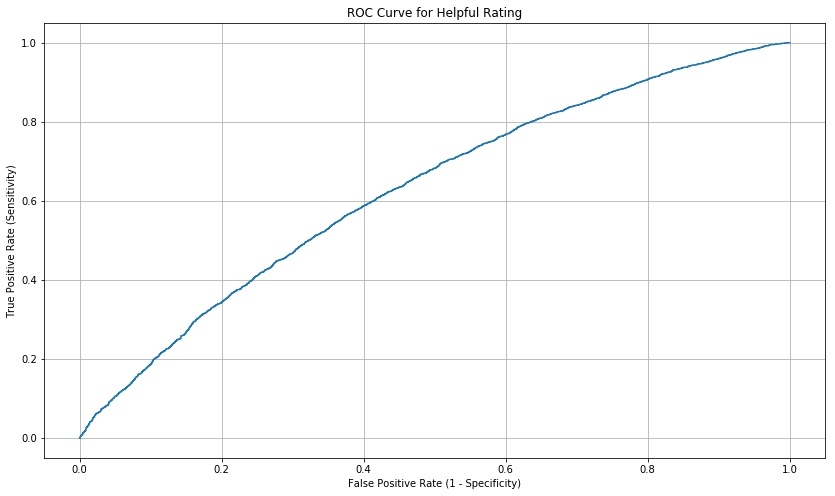

In [46]:
clf2 = gs2.best_estimator_
probas2 =clf2.predict_proba(X_val2)
pred2 = clf2.predict(X_val2.toarray())
plt.figure(figsize = (14,8))
plt.plot(roc_curve(y_val2, probas2[:,1])[0], roc_curve(y_val2, probas2[:,1])[1])
plt.title('ROC Curve for Helpful Rating')
plt.grid()
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show

# ROC/AUC score
print ('ROC_AUC Score:',roc_auc_score(y_val2, probas2[:,1].T))
print("Test Accuracy:", accuracy_score(y_val2,pred2))

In [47]:
clf2.coef_

array([[-0.03983611, -0.06639785, -0.21196913, ...,  0.34319426,
         0.30058002,  0.08069053]])

In [48]:
probas3 =clf2.predict_proba(features_test.toarray())
probas3

array([[0.24493113, 0.75506887],
       [0.28829901, 0.71170099],
       [0.31432228, 0.68567772],
       ...,
       [0.25586118, 0.74413882],
       [0.16138304, 0.83861696],
       [0.15209068, 0.84790932]])

In [49]:
len(probas3)

14000

In [50]:
pred_test = clf2.predict(features_test.toarray())
print(pred_test)

[1 1 1 ... 1 1 1]


In [51]:
pred_test.shape

(14000,)

In [52]:
import warnings
warnings.filterwarnings("ignore")

In [53]:
counter_test = 0
prediction_values = []
for i in test_df['helpful_denominator']:
    if i == 0:
        prediction_values.append(0)
    elif i == 1:
        if test_df.loc[counter_test,['rating']].item() >=3:
              prediction_values.append(1)
        else:
            prediction_values.append(0)
    elif i == 2:
        if test_df.loc[counter_test,['rating']].item() >=3:
            prediction_values.append(2)
        else:
            prediction_values.append(int(round(i*probas3[counter_test][0],0)))
    #elif i ==3:
    #    if test_df.loc[counter_test,['rating']].item() >=3:
    #        prediction_values9.append(3)
        #elif test_df.loc[counter_test,['rating']].item() >=3:
        #    prediction_values7.append(int(round(i*probas3[counter_test][1],0)))       
    #    else:
    #        prediction_values9.append(int(round(i*probas3[counter_test][1],0)))
    elif test_df.loc[counter_test,['rating']].item() ==5:
        prediction_values.append(max(i,i*pred_test[counter_test]))
    elif test_df.loc[counter_test,['rating']].item() ==4:
        prediction_values.append(i*pred_test[counter_test])
    elif probas3[counter_test][1] <= .5:
        prediction_values.append(int(round(i*probas3[counter_test][0],0)))
    #elif probas3[counter_test][1] <=.65:
        #print(probas3[counter_test][1])
    #    prediction_values10.append(int(round(i*probas3[counter_test][1],0)))
    else:
        prediction_values.append(i*pred_test[counter_test])
    counter_test += 1
prediction_values

[2,
 0,
 1,
 1,
 0,
 2,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 3,
 0,
 0,
 0,
 3,
 3,
 0,
 0,
 0,
 0,
 0,
 2,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 3,
 0,
 2,
 0,
 7,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 9,
 0,
 0,
 9,
 0,
 5,
 0,
 0,
 3,
 0,
 0,
 1,
 0,
 10,
 1,
 0,
 0,
 1,
 0,
 0,
 5,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 17,
 1,
 0,
 0,
 0,
 2,
 8,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 0,
 1,
 0,
 0,
 3,
 3,
 3,
 81,
 2,
 1,
 0,
 1,
 6,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 95,
 0,
 2,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 4,
 2,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 6,
 2,
 1,
 0,
 0,
 0,
 2,
 5,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 3,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 2,
 2,
 0,
 0,
 1,
 4,
 3,
 0,
 0,
 0,
 2,
 17,
 1,
 2,
 0,
 5,
 0,
 0,
 0,
 1,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,

In [54]:
#counter_test = 0
#prediction_values = []
#for i in test_df['helpful_denominator']:
#    if i == 0:
#    #    print(i)
#        prediction_values.append(0)
#    else:
#     #   print(i)
#        prediction_values.append(i*pred_test[counter_test])
#    counter_test += 1
#prediction_values

In [55]:
#test_df = test_df.drop(columns=['predictions'])
#test_df.head(5)

In [31]:
test_df['predictions'] = prediction_values
test_df.head()

NameError: name 'prediction_values' is not defined

In [57]:
counter = 0
predictions = open("predictions_Helpful_testdf13.txt", 'w')
for l in open("pairs_Helpful.txt"):
  if l.startswith("userID"):
    #header
    predictions.write(l)
    continue
  u,i,outOf = l.strip().split('-')
  outOf = int(outOf)
  #for pred in b:
  predictions.write(u + '-' + i + '-' + str(outOf) + ',' + str(test_df.loc[counter,'predictions']) + '\n')
  counter +=1
  #else:
  #  predictions.write(u + '-' + i + '-' + str(outOf) + ',' + str(outOf*averageRate) + '\n')
predictions.close()

In [58]:
#b #1st predictions
#prediction_values3 #3nd best
#prediction_values4
#prediction_values5
#prediction_values6 #2st best
#prediction_values7
#prediction_values8
#prediction_values9
#prediction_values10 #Best